In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.decomposition import PCA


# Step 1.Data Preparation

In [40]:
## Loading dataset:
avocado_df = pd.read_csv("C:/Users/swati/Downloads/avocado.csv/avocado.csv")
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [41]:
## Checking Size:
avocado_df.shape

(18249, 14)

There are 18249 rows and 14 columns.Unnamed is an index column so  will drop it.

In [42]:
avocado_df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [43]:
## Dropping column Unnamed: 0
avocado_df.drop('Unnamed: 0',axis=1,inplace=True)

In [44]:
avocado_df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [45]:
avocado_df.shape

(18249, 13)

Now DataFrame has 13 columns.

In [46]:
## Extract month and date into different columns to do better understanding of data:-
avocado_df['Month'] = pd.DatetimeIndex(avocado_df['Date']).month
avocado_df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [47]:
avocado_df['Date'] = pd.DatetimeIndex(avocado_df['Date']).day
avocado_df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,6,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [48]:
avocado_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  int64  
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
 13  Month         18249 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 1.9+ MB


type and region are categorical columns and rest columns are numerical.

# Step 2:- EDA

In [49]:
##  count sale of both avocado types:- 
avocado_df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [50]:
## year wise sales of avocado:-
avocado_df['year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

In [13]:
## Region wise sales of avocado:-
avocado_df['region'].value_counts()

Albany                 338
Denver                 338
SanFrancisco           338
SanDiego               338
Plains                 338
CincinnatiDayton       338
Sacramento             338
SouthCarolina          338
California             338
Seattle                338
LasVegas               338
TotalUS                338
Louisville             338
Roanoke                338
Midsouth               338
GreatLakes             338
SouthCentral           338
West                   338
BuffaloRochester       338
Northeast              338
Columbus               338
Orlando                338
NorthernNewEngland     338
HarrisburgScranton     338
Detroit                338
Pittsburgh             338
NewYork                338
Syracuse               338
Philadelphia           338
RichmondNorfolk        338
DallasFtWorth          338
NewOrleansMobile       338
MiamiFtLauderdale      338
Spokane                338
Jacksonville           338
LosAngeles             338
Atlanta                338
N

In [51]:
#checking the average year of volume of avacado per year:
avocado_df.groupby('year')['Total Volume'].mean()

year
2015    7.810274e+05
2016    8.584206e+05
2017    8.623393e+05
2018    1.066928e+06
Name: Total Volume, dtype: float64

In [52]:
#finding sale of avacado in given years :
avocado_df.groupby('year')['type'].value_counts()


year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

In [53]:
avocado_df.groupby('type')['AveragePrice'].count()


type
conventional    9126
organic         9123
Name: AveragePrice, dtype: int64

In [54]:
#Sell of avocado between 2015 to 2018
avocado_df.groupby('year')['Total Volume'].count()


year
2015    5615
2016    5616
2017    5722
2018    1296
Name: Total Volume, dtype: int64

In [55]:
## Checking  Conventional type of Avacado:
conventional = avocado_df[avocado_df['type'] == 'conventional']
conventional


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany,12
1,20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany,12
2,13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany,12
3,6,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany,12
4,29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9121,4,0.76,1272039.80,531469.08,368948.26,13078.20,358544.26,127833.03,229786.03,925.20,conventional,2018,WestTexNewMexico,2
9122,28,0.85,957086.16,479147.93,179489.19,7314.98,291134.06,143430.96,147376.43,326.67,conventional,2018,WestTexNewMexico,1
9123,21,0.84,1020913.20,505263.29,177911.40,9468.95,328269.56,118978.50,209131.06,160.00,conventional,2018,WestTexNewMexico,1
9124,14,0.90,950954.60,463945.73,188126.02,11227.47,287655.38,125408.69,162040.02,206.67,conventional,2018,WestTexNewMexico,1


In [56]:
conventional.groupby('year')['AveragePrice'].mean()

year
2015    1.077963
2016    1.105595
2017    1.294888
2018    1.127886
Name: AveragePrice, dtype: float64

In [57]:
## Checking  Organic type of Avacado:
organic = avocado_df[avocado_df['type'] == 'organic']
organic



,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
9126,27,1.83,989.55,8.16,88.59,0.00,892.80,892.80,0.00,0.0,organic,2015,Albany,12
9127,20,1.89,1163.03,30.24,172.14,0.00,960.65,960.65,0.00,0.0,organic,2015,Albany,12
9128,13,1.85,995.96,10.44,178.70,0.00,806.82,806.82,0.00,0.0,organic,2015,Albany,12
9129,6,1.84,1158.42,90.29,104.18,0.00,963.95,948.52,15.43,0.0,organic,2015,Albany,12
9130,29,1.94,831.69,0.00,94.73,0.00,736.96,736.96,0.00,0.0,organic,2015,Albany,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,4,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2
18245,28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1
18246,21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1
18247,14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1


In [58]:
organic.groupby('year')['AveragePrice'].mean()

year
2015    1.673324
2016    1.571684
2017    1.735521
2018    1.567176
Name: AveragePrice, dtype: float64

Here we can see in every year average price of organic avacado is more than conventional avacado.

# Visualization

array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>,
        <AxesSubplot:title={'center':'4225'}>],
       [<AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>,
        <AxesSubplot:title={'center':'XLarge Bags'}>],
       [<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'Month'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

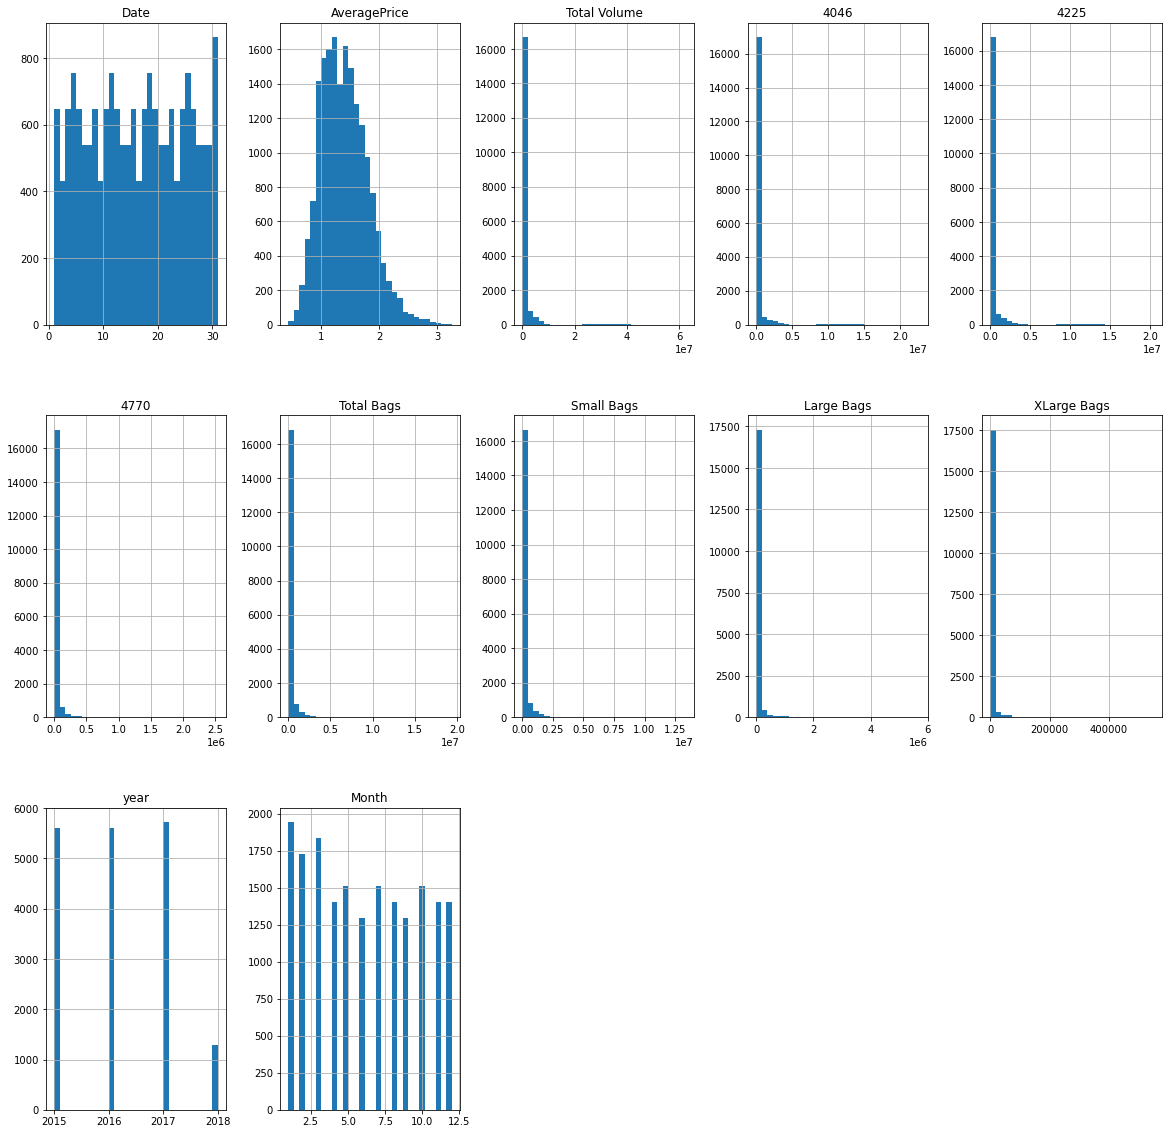

In [59]:
avocado_df.hist(figsize=(20,20), grid = True, layout = (3,5), bins = 30)


# Univariate Analysis:

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

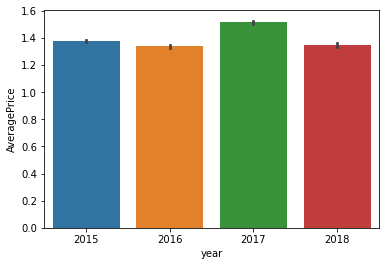

In [23]:
#Visualizing target variable dependency on year means which year has maximum Average Price:-
sns.barplot(x = "year" , y = "AveragePrice" ,data=avocado_df )


2017 year has maximum average price.

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

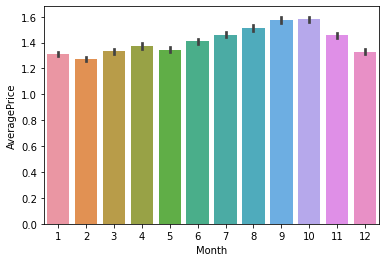

In [24]:
## Relation between Month and AveragePrice
sns.barplot(x = "Month" , y = "AveragePrice" ,data=avocado_df )


We can see from August to October ,more sales than other months.

In [25]:
avocado_df['Month'].value_counts()

1     1944
3     1836
2     1728
5     1512
7     1512
10    1512
4     1404
8     1404
11    1404
12    1403
9     1296
6     1294
Name: Month, dtype: int64

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

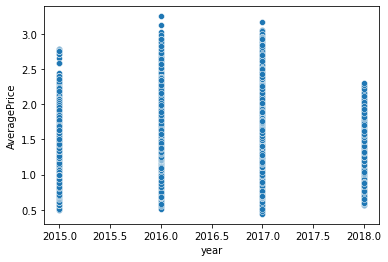

In [26]:
sns.scatterplot(x = 'year', y = 'AveragePrice', data=avocado_df)


<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

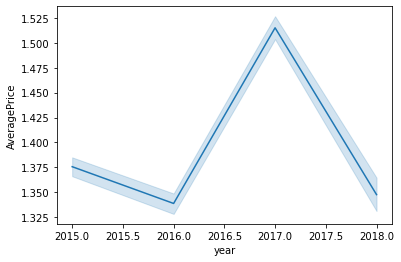

In [27]:
## more clear analysis of data distribution between year and AveragePrice
sns.lineplot(x = 'year', y = 'AveragePrice', data=avocado_df)


<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

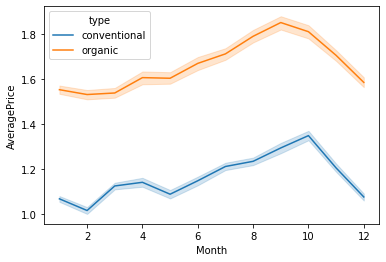

In [28]:

sns.lineplot(x="Month", y="AveragePrice", hue='type', data=avocado_df)


As we can see from graph also average price per unit of organic avacado is more than conventional avacado,But common in months between August to October,sale is more.

Text(0, 0.5, 'Average Price')

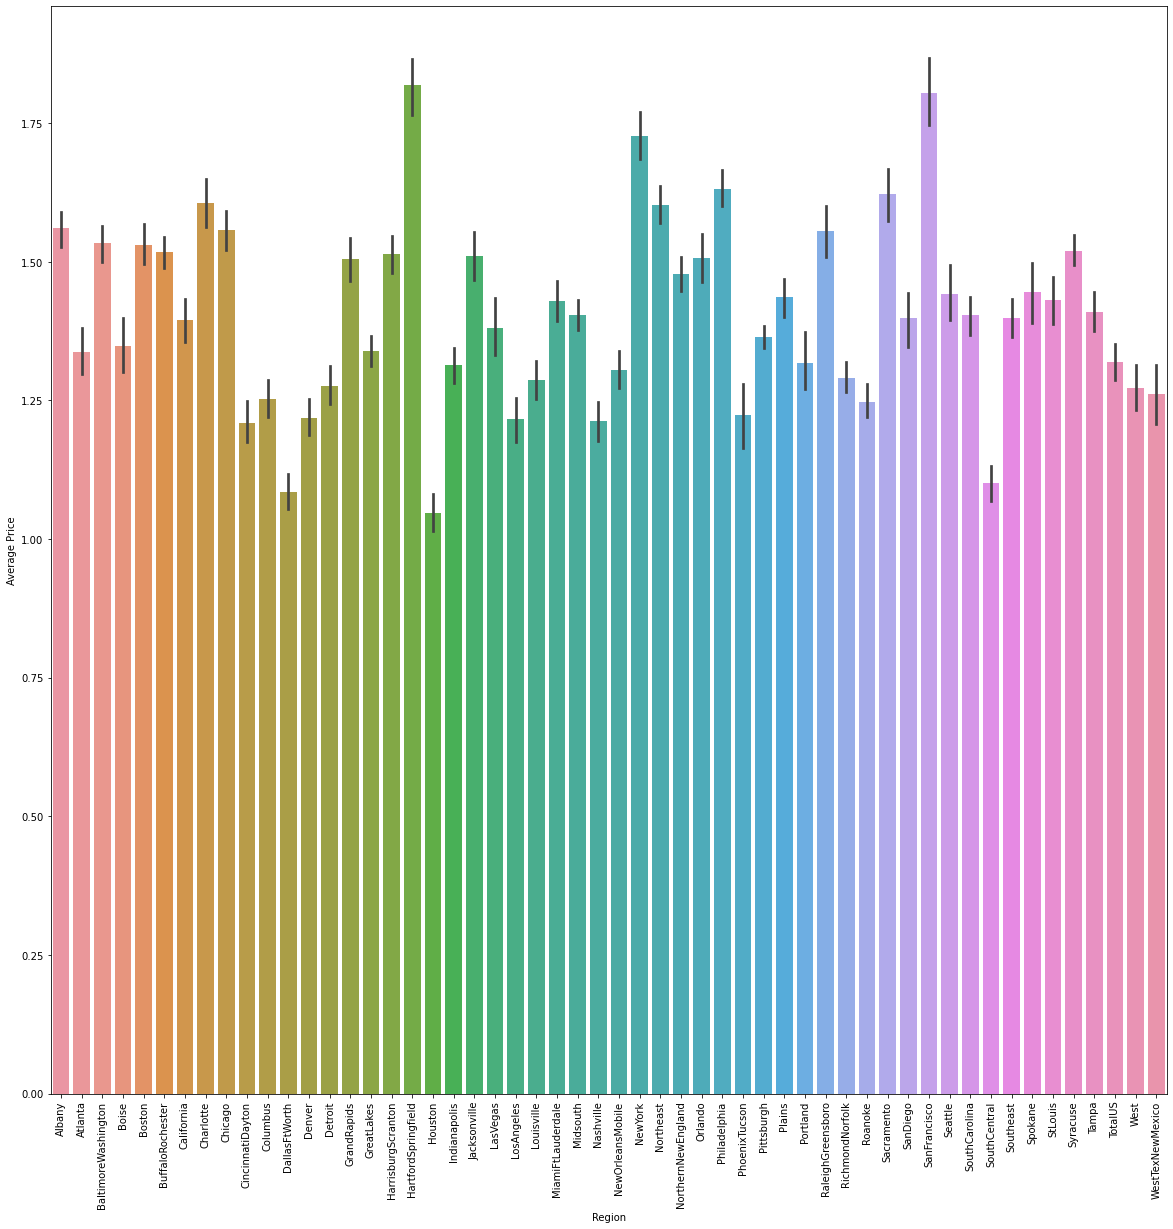

In [29]:
plt.figure(figsize=(20,20))
sns.barplot(x='region',y='AveragePrice',data=avocado_df)
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')


HartfordSpringfield,Newyork,and SanFransisco has more sales than other regions.

# Multivariate Analysis


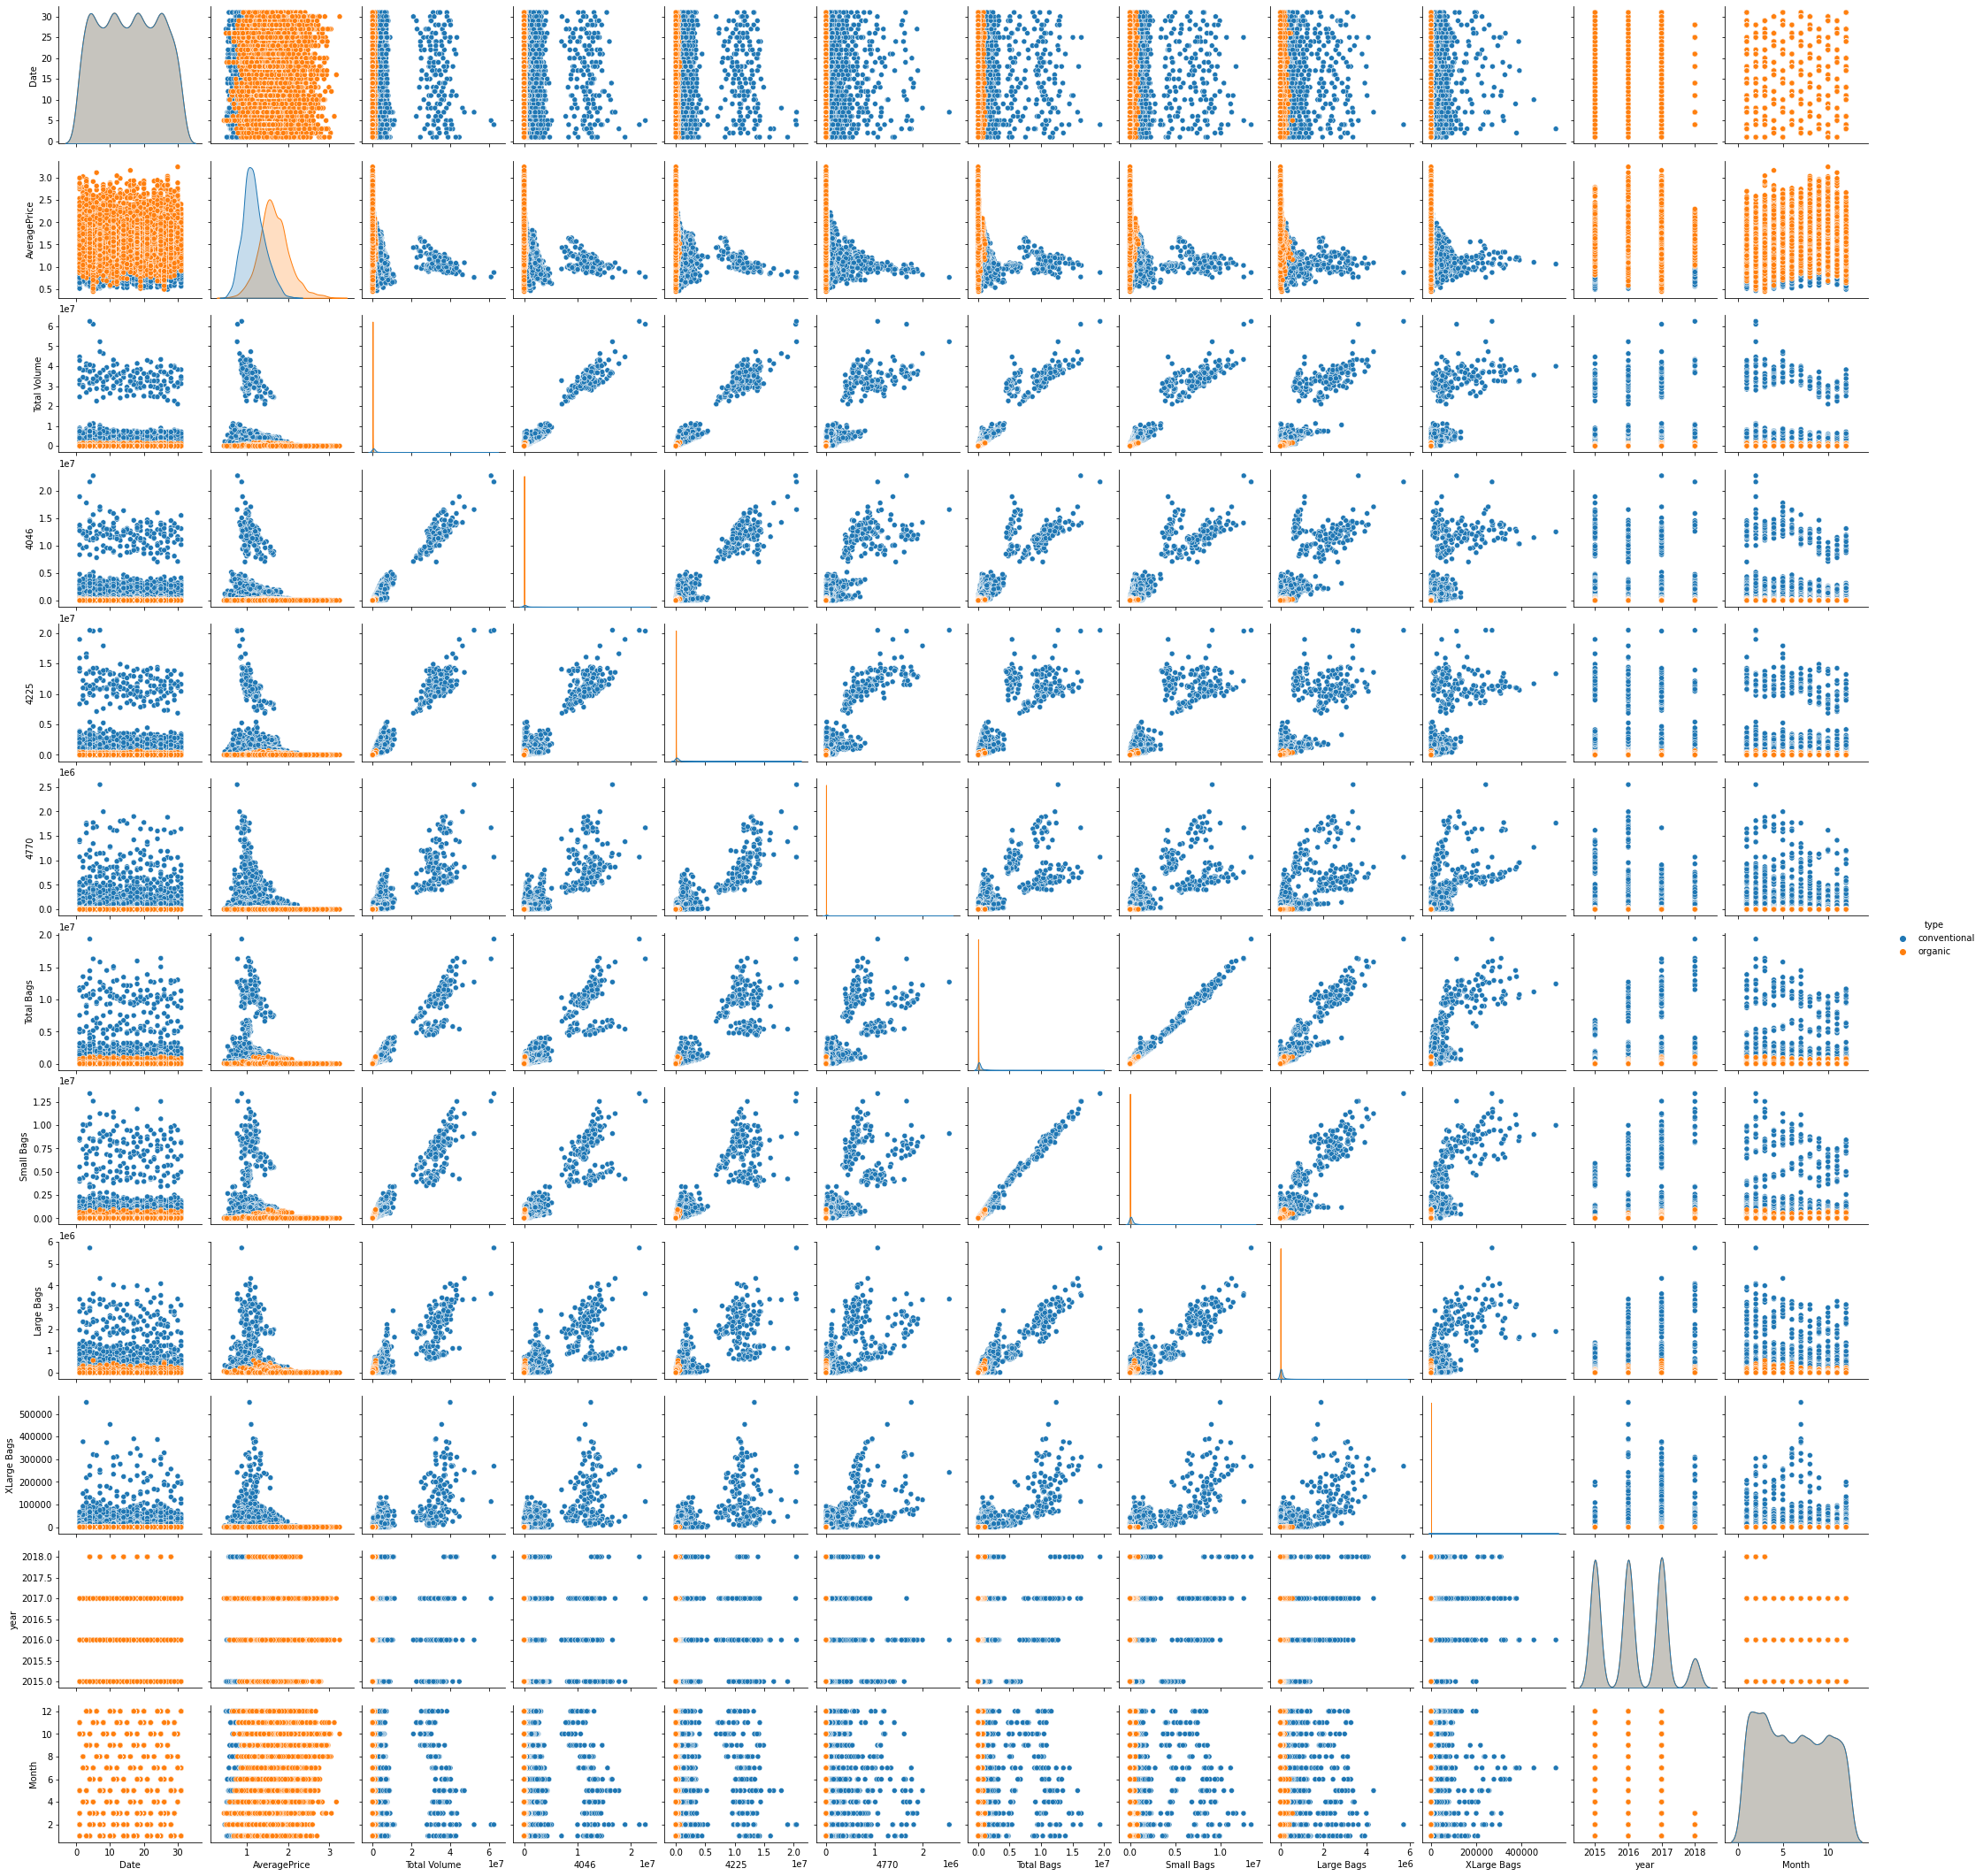

In [60]:

sns.pairplot(avocado_df,hue='type')

# Data Preprocessing

Two columns are categorical type and region,So using LabelEncoder,Converting it into numerical value.

In [61]:
col = ['type','region']
le = LabelEncoder()
for i in col:
    avocado_df[i]=le.fit_transform(avocado_df[i])
avocado_df.head()    
    
    

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12
1,20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12
2,13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12
3,6,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12
4,29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11


In [62]:
avocado_df.dtypes

Date              int64
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year              int64
region            int32
Month             int64
dtype: object

Here we can see All columns data types are now int or float 

In [63]:
## Checking for missing values:-
avocado_df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
dtype: int64

So we can see ,Not any null values are present.

In [64]:
## Checking correlation:
avocado_df.corr()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
Date,1.000000,0.027386,-0.009747,-0.010159,-0.012393,-0.009009,-0.004988,-0.003870,-0.008352,0.000319,-0.000013,0.004475,-0.000021,0.010621
AveragePrice,0.027386,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716,0.162409
Total Volume,-0.009747,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176,-0.024689
4046,-0.010159,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073,-0.025803
4225,-0.012393,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726,-0.022108
4770,-0.009009,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252,-0.033424
Total Bags,-0.004988,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256,-0.022724
Small Bags,-0.003870,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702,-0.023126
Large Bags,-0.008352,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768,-0.020187
XLarge Bags,0.000319,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281,-0.012969


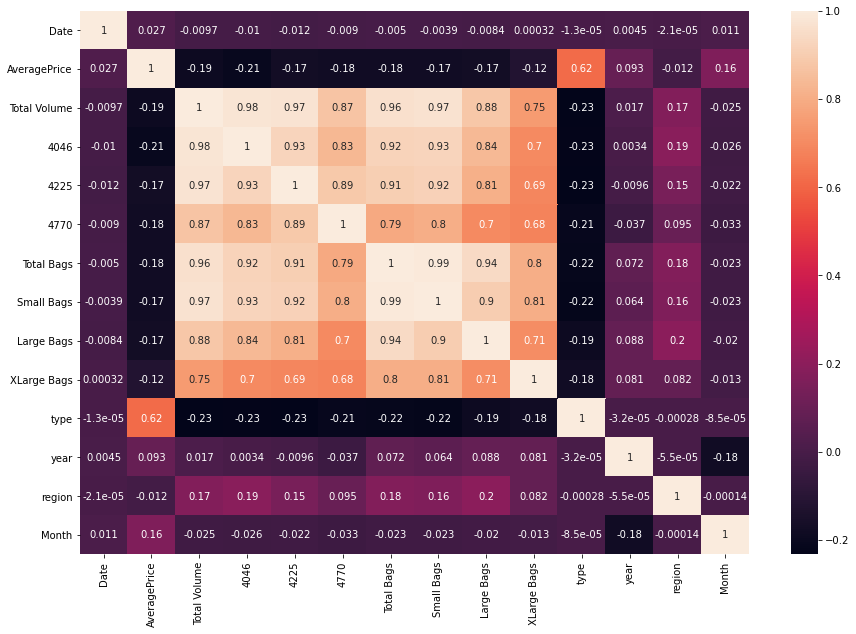

In [65]:
plt.figure(figsize=(15,10))
sns.heatmap(avocado_df.corr(),annot=True)
plt.show()

In [66]:
avocado_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  int64  
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  int32  
 11  year          18249 non-null  int64  
 12  region        18249 non-null  int32  
 13  Month         18249 non-null  int64  
dtypes: float64(9), int32(2), int64(3)
memory usage: 1.8 MB


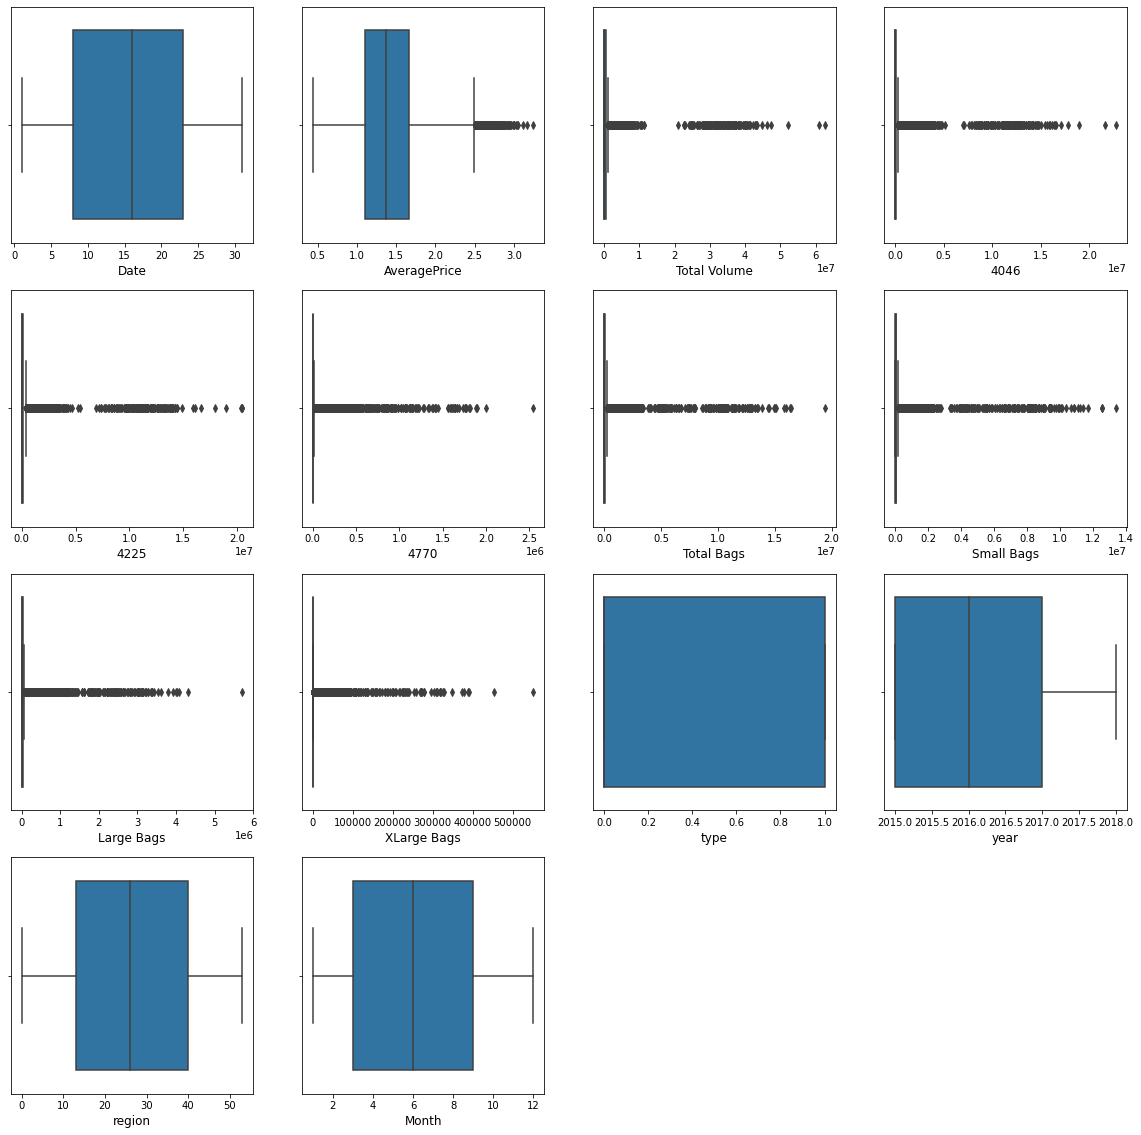

In [67]:
plt.figure(figsize=(20,20))
plotnumber=1

for column in avocado_df:
    if plotnumber <= 15:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(avocado_df[column],orient='v')
        plt.xlabel(column,fontsize=12)
        plotnumber +=1
plt.show()        

Some of the columns have outliers,will remove it using zscore method.

# Using Inter Quartile Range to remove Outliers:

In [68]:
avocado_df.describe()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000
mean,15.662612,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,2016.147899,26.495644,6.177215
std,8.776281,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788,3.534130
min,1.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,0.000000,1.000000
25%,8.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,2015.000000,13.000000,3.000000
50%,16.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,2016.000000,26.000000,6.000000
75%,23.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2017.000000,40.000000,9.000000
max,31.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,2018.000000,53.000000,12.000000


In [69]:
avocado_df.rename(columns = {'4046':'PLU_4046','4225':'PLU_4225','4770':'PLU_4770','Total Volume':'Total_Volume','Total Bags':'Total_Bags','Small Bags':'Small_Bags','Large Bags':'Large_Bags','XLarge Bags':'XLarge_Bags'},inplace=True)


In [70]:
avocado_df.columns

Index(['Date', 'AveragePrice', 'Total_Volume', 'PLU_4046', 'PLU_4225',
       'PLU_4770', 'Total_Bags', 'Small_Bags', 'Large_Bags', 'XLarge_Bags',
       'type', 'year', 'region', 'Month'],
      dtype='object')

In [71]:
## 1st quantile:
q1 = avocado_df.quantile(0.25)
## 3rd quantile:-
q3 = avocado_df.quantile(0.75)
## IQR :-
iqr = q3 - q1

Outlier Detection Formula:-
    Higher Side = Q3 + (1.5 * IQR) 
    Lower Side = Q1 - (1.5 * IQR )

Through box plot we can see outliers are present in upper side.So removing outliers from upper side.

In [72]:
### removing outliers from Total Volume column :-
volume_upperside =(q3.Total_Volume+(1.5 * iqr.Total_Volume))
volume_upperside

1066147.855

In [73]:
### Finding index of that data which are greater than 1066147.855:-
index =np.where(avocado_df['Total_Volume'] >  volume_upperside)
index

(array([  312,   313,   314, ..., 18222, 18223, 18224], dtype=int64),)

In [74]:
## Dropping that data which are  supposed to be outliers:-
avocado_df = avocado_df.drop(avocado_df.index[index])
avocado_df.shape

(15952, 14)

In [75]:
### removing outliers from PLU_4046 column :-
PLU_4046_upperside =(q3.PLU_4046+(1.5 * iqr.PLU_4046))
PLU_4046_upperside

276269.39499999996

In [77]:
### Finding index of that data which are greater than 276269.39499999996:-
index =np.where(avocado_df['PLU_4046'] >  PLU_4046_upperside)
index

(array([  52,   54,   55,   60,   66,   67,   68,   71,   72,   73,   74,
          75,   76,   77,   78,   79,   80,   81,   82,   83,   84,   85,
          86,   87,   88,   89,   90,   91,   92,   93,   94,   95,   96,
          97,   98,   99,  100,  101,  102,  103,  519,  520,  521,  522,
         523,  524,  525,  526,  527,  528,  529,  530,  531,  792,  793,
         794,  795,  796,  797,  798,  799,  800,  801,  802,  803,  804,
         805,  806,  807,  808,  809,  810,  811,  812,  813,  814,  815,
         816,  817,  818,  819,  820,  821,  822,  823, 1032, 1034, 1036,
        1037, 1040, 1043, 1044, 1046, 1048, 1052, 1055, 1057, 1059, 1061,
        1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1072, 1075,
        1079, 1080, 1081, 1083, 1276, 1279, 1292, 1349, 1350, 1351, 1352,
        1353, 1354, 1355, 1356, 1357, 1358, 1359, 1360, 1361, 1362, 1363,
        1364, 1365, 1366, 1367, 1368, 1369, 1370, 1371, 1679, 1701, 1703,
        1704, 1706, 1709, 1710, 1711, 

In [78]:
## Dropping that data which are  supposed to be outliers:-
avocado_df = avocado_df.drop(avocado_df.index[index])
avocado_df.shape

(15353, 14)

In [79]:
### removing outliers from PLU_4225 column :-
PLU_4225_upperside =(q3.PLU_4225+(1.5 * iqr.PLU_4225))
PLU_4225_upperside

371003.98

In [80]:
### Finding index of that data which are greater than 371003.98:-
index =np.where(avocado_df['PLU_4225'] >  PLU_4225_upperside)
index

(array([   64,    65,    66,    67,    68,    69,    70,    71,    72,
           73,    74,    75,    76,    77,    78,    79,    80,    81,
           82,    83,    84,    85,    86,    87,    88,    89,    90,
           91,    92,    93,    94,    95,    96,    97,    98,    99,
          100,   101,   102,   103,   104,   105,   107,   108,   110,
          111,   112,   113,   114,   115,   169,   170,   171,   173,
          174,   175,   176,   177,   178,   179,   180,   181,   182,
          183,   184,   185,   186,   187,   188,   189,   190,   191,
          192,   193,   194,   195,   196,   197,   198,   199,   200,
          201,   202,   204,   211,   214,   215,   219,   324,   325,
          326,   327,   328,   329,   330,   331,   332,   333,   334,
          335,   336,   337,   338,   339,   340,   341,   342,   343,
          344,   345,   346,   347,   348,   349,   350,   351,   352,
          353,   354,   355,   356,   357,   358,   359,   360,   361,
      

In [81]:
## Dropping that data which are  supposed to be outliers:-
avocado_df = avocado_df.drop(avocado_df.index[index])
avocado_df.shape

(14721, 14)

In [82]:
### removing outliers from PLU_4770 column :-
PLU_4770_upperside =(q3.PLU_4770+(1.5 * iqr.PLU_4770))
PLU_4770_upperside

15608.550000000001

In [83]:
### Finding index of that data which are greater than 15608.550000000001:-
index =np.where(avocado_df['PLU_4770'] >  PLU_4770_upperside)
index

(array([   64,    65,   184,   185,   186,   187,   188,   189,   190,
          191,   192,   193,   194,   195,   196,   197,   198,   199,
          200,   201,   202,   203,   204,   205,   206,   207,   208,
          209,   210,   211,   212,   213,   214,   215,   216,   217,
          218,   219,   220,   221,   222,   223,   224,   225,   226,
          227,   228,   229,   230,   231,   232,   233,   234,   235,
          243,   250,   251,   255,   276,   279,   283,   289,   291,
          292,   293,   295,   296,   297,   298,   299,   300,   301,
          302,   303,   304,   305,   306,   307,   308,   309,   311,
          312,   313,   315,   316,   317,   320,   322,   323,   324,
          328,   331,   335,   340,   341,   342,   344,   346,   347,
          348,   349,   350,   351,   352,   353,   354,   355,   356,
          357,   358,   359,   360,   361,   362,   363,   364,   365,
          366,   367,   368,   369,   370,   371,   372,   373,   374,
      

In [84]:
## Dropping that data which are  supposed to be outliers:-
avocado_df = avocado_df.drop(avocado_df.index[index])
avocado_df.shape

(13755, 14)

In [85]:
### removing outliers from Total_Bags column :-
Tbag_upperside =(q3.Total_Bags+(1.5 * iqr.Total_Bags))
Tbag_upperside

269325.46499999997

In [86]:
### Finding index of that data which are greater than 269325.46499999997:-

index =np.where(avocado_df['Total_Bags'] >  Tbag_upperside)
index

(array([  906,  1084,  1087,  1423,  1425,  1426,  1642,  1643,  1644,
         1645,  1647,  1648,  1649,  1650,  1652,  1653,  1654,  1655,
         1656,  2011,  2250,  2303,  2304,  2305,  2306,  2311,  2312,
         2313,  2314,  2315,  2316,  2317,  2318,  2319,  2320,  2321,
         2484,  2485,  2491,  2492,  2493,  2494,  2495,  2496,  2497,
         2498,  2499,  2500,  2501,  2502,  2503,  2504,  2505,  2506,
         2507,  2508,  2509,  2510,  2511,  2512,  2513,  2514,  2515,
         2516,  2517,  2518,  2519,  2520,  2521,  2522,  2523,  2524,
         2525,  2526,  2527,  2528,  2529,  2530,  2531,  2532,  3073,
         3078,  3150,  3151,  3152,  3153,  3154,  3156,  3157,  3158,
         3159,  3166,  3167,  3168,  3169,  3171,  3172,  3173,  3174,
         3175,  3176,  3177,  3178,  3822,  3825,  3826,  3835,  3840,
         3841,  3842,  3843,  4080,  4094,  4101,  4102,  4103,  4104,
         4105,  4106,  4107,  4108,  4109,  4110,  4111,  4112,  4113,
      

In [87]:
## Dropping that data which are  supposed to be outliers:-
avocado_df = avocado_df.drop(avocado_df.index[index])
avocado_df.shape

(13539, 14)

In [88]:
### removing outliers from Small_Bags column :-
Sbag_upperside =(q3.Small_Bags+(1.5 * iqr.Small_Bags))
Sbag_upperside

204070.04499999998

In [89]:
### Finding index of that data which are greater than 204070.04499999998:-

index =np.where(avocado_df['Small_Bags'] >  Sbag_upperside)
index

(array([ 1089,  1494,  2220,  2282,  2283,  2284,  2285,  2446,  2447,
         2448,  2449,  2450,  2451,  2452,  2574,  2575,  3080,  3085,
         3088,  3659,  3946,  3972,  4282,  4288,  4454, 11648, 11649,
        11650, 11651, 11653, 13216, 13259, 13261, 13262], dtype=int64),)

In [90]:
## Dropping that data which are  supposed to be outliers:-
avocado_df = avocado_df.drop(avocado_df.index[index])
avocado_df.shape

(13505, 14)

In [91]:
### removing outliers from Large_Bags column :-
Lbag_upperside =(q3.Large_Bags+(1.5 * iqr.Large_Bags))
Lbag_upperside

54881.92

In [92]:
### Finding index of that data which are greater than 54881.92:-

index =np.where(avocado_df['Large_Bags'] >  Lbag_upperside)
index

(array([  184,   247,   248,  1312,  1313,  1315,  1317,  1398,  1399,
         1400,  1401,  1402,  1403,  1404,  1405,  1406,  1407,  1408,
         1409,  1410,  1411,  1412,  1413,  1414,  1415,  1416,  1417,
         1419,  1420,  1421,  1422,  1559,  1560,  1561,  1562,  1563,
         1564,  1565,  1566,  1567,  1568,  1569,  1570,  1571,  1572,
         1573,  1574,  1575,  1576,  1577,  1578,  1579,  1580,  1581,
         1582,  1583,  1584,  1585,  1586,  1588,  1589,  1634,  1635,
         1833,  1835,  1842,  1864,  1866,  1867,  1869,  1873,  1875,
         1878,  1884,  1885,  1886,  1887,  1888,  1892,  1893,  1894,
         1898,  1899,  1900,  1912,  1913,  1914,  1916,  1918,  1919,
         1920,  1924,  1928,  1987,  1988,  1989,  1990,  1991,  1992,
         1993,  1994,  1995,  1996,  1997,  1998,  1999,  2000,  2001,
         2008,  2009,  2010,  2011,  2012,  2141,  2142,  2144,  2146,
         2148,  2149,  2151,  2152,  2153,  2154,  2155,  2156,  2157,
      

In [93]:
## Dropping that data which are  supposed to be outliers:-
avocado_df = avocado_df.drop(avocado_df.index[index])
avocado_df.shape

(12965, 14)

In [94]:
### removing outliers from XLarge_Bags column :-
XLbag_upperside =(q3.XLarge_Bags+(1.5 * iqr.XLarge_Bags))
XLbag_upperside

331.25

In [95]:
### Finding index of that data which are greater than 331.25:-

index =np.where(avocado_df['XLarge_Bags'] >  XLbag_upperside)
index

(array([  67,   70,  182, ..., 4101, 4102, 4103], dtype=int64),)

In [96]:
## Dropping that data which are  supposed to be outliers:-
avocado_df = avocado_df.drop(avocado_df.index[index])
avocado_df.shape

(11747, 14)

In [97]:
avocado_df.skew()

Date            0.006476
AveragePrice    0.497919
Total_Volume    2.115939
PLU_4046        3.256634
PLU_4225        3.346407
PLU_4770        3.815776
Total_Bags      1.917330
Small_Bags      2.156517
Large_Bags      2.703967
XLarge_Bags     6.117440
type           -1.170526
year            0.270529
region         -0.035609
Month           0.085183
dtype: float64

Total_Volume,PLU_4046,PLU_4046,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags have skewed data.

In [98]:
from sklearn.preprocessing import PowerTransformer
skewed_features = ["Total_Volume","PLU_4046","PLU_4225","PLU_4770","Total_Bags","Small_Bags","Large_Bags","XLarge_Bags"]
scaler = PowerTransformer(method='yeo-johnson')


In [99]:
avocado_df[skewed_features] = scaler.fit_transform(avocado_df[skewed_features].values)
avocado_df[skewed_features].head()


,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags
0,0.643969,-0.226580,1.108648,0.572337,-0.069823,0.147370,-0.423468,-0.330176
1,0.550981,-0.377757,0.999259,0.625788,-0.017885,0.194675,-0.411617,-0.330176
2,0.999725,-0.320467,1.508904,0.835454,-0.107754,0.112052,-0.396535,-0.330176
3,0.765350,-0.195212,1.265889,0.685086,-0.298758,-0.064950,-0.325965,-0.330176
4,0.508017,-0.260786,0.989409,0.696579,-0.264144,-0.038580,-0.216892,-0.330176


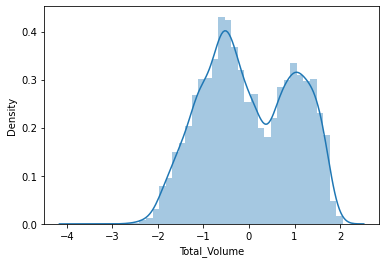

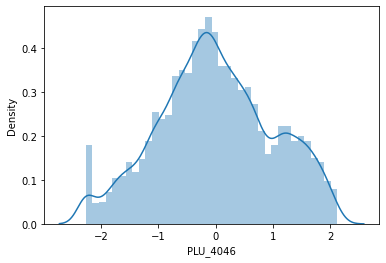

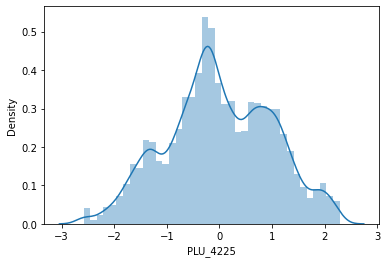

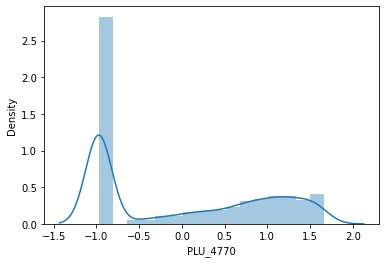

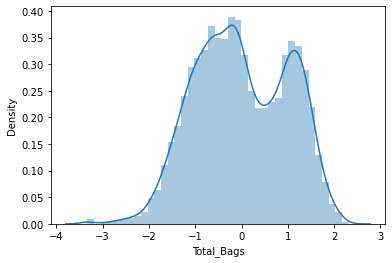

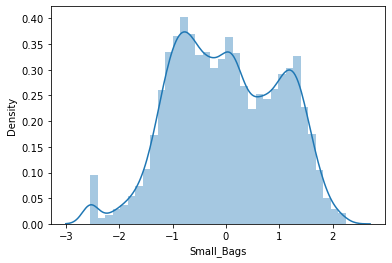

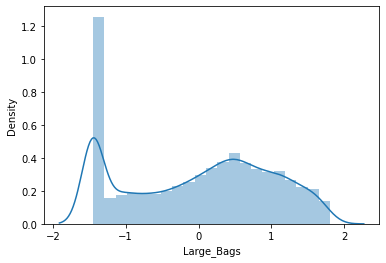

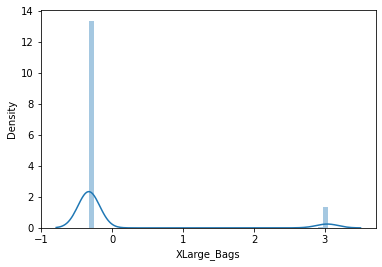

In [100]:
columns = avocado_df[["Total_Volume","PLU_4046","PLU_4225","PLU_4770","Total_Bags","Small_Bags","Large_Bags","XLarge_Bags"]]
for i in columns:
    sns.distplot(avocado_df[i])
    plt.show()


# Data Splitting:-

In [101]:
#assign the value of x and y for training and testing phase
x = avocado_df.drop(columns=['AveragePrice','Date'])
y = avocado_df["AveragePrice"]
print(x.shape)
print(y.shape)


(11747, 12)
(11747,)


In [102]:
#Standardize the value of x so that mean will 0 and SD will become 1 , and make the data as normal distributed
sc = StandardScaler()
sc.fit_transform(x)


array([[ 0.64396852, -0.22657953,  1.10864778, ..., -1.16468113,
        -1.69843406,  1.60174788],
       [ 0.55098068, -0.37775734,  0.99925885, ..., -1.16468113,
        -1.69843406,  1.60174788],
       [ 0.99972514, -0.32046683,  1.50890428, ..., -1.16468113,
        -1.69843406,  1.60174788],
       ...,
       [-0.28611936, -0.17673045, -0.37272687, ...,  2.02299576,
         1.74864611, -1.45140238],
       [-0.18545273, -0.08702685, -0.29247245, ...,  2.02299576,
         1.74864611, -1.45140238],
       [-0.13855122,  0.15013739, -0.38907559, ...,  2.02299576,
         1.74864611, -1.45140238]])

# Step 3.Choosing the Model:-

In [104]:
#Now by using multiple Algorithms we are calculating the best model which suit best for our data set:- 

model = [DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),LinearRegression(),GradientBoostingRegressor(),RandomForestRegressor()]
max_r2_score = 0
for r_state in range(40,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = r_state,test_size = 0.30)
    for i in model:
        i.fit(x_train,y_train)
        pred = i.predict(x_test)
        score = r2_score(y_test,pred)
        print("R2 score correspond to random state " ,r_state ,"is", score)
        if score> max_r2_score:
            max_r2_score=score
            final_state = r_state
            final_model = i
            
print("max R2 score correspond to random state " ,final_state , "is" , max_r2_score ,"and model is",final_model)


R2 score correspond to random state  40 is 0.608251401291596
R2 score correspond to random state  40 is 0.8174605893570039
R2 score correspond to random state  40 is 0.49541664987657497
R2 score correspond to random state  40 is 0.46728034544799735
R2 score correspond to random state  40 is 0.7018087840395667
R2 score correspond to random state  40 is 0.8369476953429265
R2 score correspond to random state  41 is 0.6504089685075864
R2 score correspond to random state  41 is 0.8119961867527719
R2 score correspond to random state  41 is 0.5076846333630439
R2 score correspond to random state  41 is 0.4602424142823619
R2 score correspond to random state  41 is 0.7007460410341023
R2 score correspond to random state  41 is 0.8494586684910246
R2 score correspond to random state  42 is 0.6592721142281873
R2 score correspond to random state  42 is 0.8331764064582831
R2 score correspond to random state  42 is 0.4955703702641444
R2 score correspond to random state  42 is 0.47602215564368633
R2 sco

R2 score correspond to random state  62 is 0.4711207123139691
R2 score correspond to random state  62 is 0.45986698144609583
R2 score correspond to random state  62 is 0.7039679930259083
R2 score correspond to random state  62 is 0.8495228620788593
R2 score correspond to random state  63 is 0.6390797103593955
R2 score correspond to random state  63 is 0.8199131180730381
R2 score correspond to random state  63 is 0.5131441919215693
R2 score correspond to random state  63 is 0.4872110215002561
R2 score correspond to random state  63 is 0.6996226767409286
R2 score correspond to random state  63 is 0.8500963731192178
R2 score correspond to random state  64 is 0.6717483927150025
R2 score correspond to random state  64 is 0.8270427731785376
R2 score correspond to random state  64 is 0.4866236508701923
R2 score correspond to random state  64 is 0.47416577209473676
R2 score correspond to random state  64 is 0.7039757639867161
R2 score correspond to random state  64 is 0.8453015531783743
R2 sco

R2 score correspond to random state  84 is 0.4975345665652351
R2 score correspond to random state  84 is 0.47550823204680315
R2 score correspond to random state  84 is 0.706088360588808
R2 score correspond to random state  84 is 0.8430885809772807
R2 score correspond to random state  85 is 0.6465133532274888
R2 score correspond to random state  85 is 0.8284459009665446
R2 score correspond to random state  85 is 0.5204661036322984
R2 score correspond to random state  85 is 0.48699178621164585
R2 score correspond to random state  85 is 0.7078047879527479
R2 score correspond to random state  85 is 0.84467175430167
R2 score correspond to random state  86 is 0.6137110436313671
R2 score correspond to random state  86 is 0.8151388252374103
R2 score correspond to random state  86 is 0.4968438702354129
R2 score correspond to random state  86 is 0.4699498401398583
R2 score correspond to random state  86 is 0.7021637710582049
R2 score correspond to random state  86 is 0.8332020495545492
R2 score 

# Step 4:-Analysis/ Evaluation

# Cross Validation of models:

In [105]:
from sklearn.model_selection import ShuffleSplit
n_samples = x.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=82)
cvs = cross_val_score(DecisionTreeRegressor(), x, y, cv=cv)
print("Cross Validation of DecisionTree Regression model ",cvs.mean())


Cross Validation of DecisionTree Regression model  0.6653027094198385


In [106]:
from sklearn.model_selection import ShuffleSplit
n_samples = x.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=82)
cvs = cross_val_score(KNeighborsRegressor(), x, y, cv=cv)
print("Cross Validation of KNeighbors Regression model ",cvs.mean())


Cross Validation of KNeighbors Regression model  0.8171429812182703


In [107]:
from sklearn.model_selection import ShuffleSplit
n_samples = x.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=82)
cvs = cross_val_score(LinearRegression(), x, y, cv=cv)
print("Cross Validation of Linear Regression model ",cvs.mean())


Cross Validation of Linear Regression model  0.46940562066515285


In [108]:
from sklearn.model_selection import ShuffleSplit
n_samples = x.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=82)
cvs = cross_val_score(AdaBoostRegressor(), x, y, cv=cv)
print("Cross Validation of AdaBoost Regression model ",cvs.mean())


Cross Validation of AdaBoost Regression model  0.5048712985124677


In [109]:
from sklearn.model_selection import ShuffleSplit
n_samples = x.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=82)
cvs = cross_val_score(GradientBoostingRegressor(), x, y, cv=cv)
print("Cross Validation of GradientBoosting Regression model ",cvs.mean())


Cross Validation of GradientBoosting Regression model  0.6993530562126503


In [110]:
from sklearn.model_selection import ShuffleSplit
n_samples = x.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=82)
cvs = cross_val_score(RandomForestRegressor(), x, y, cv=cv)
print("Cross Validation of RandomForest Regression model ",cvs.mean())


Cross Validation of RandomForest Regression model  0.838953252001956


Cross validation score is maximum for RandomForest,so will do HyperParameter Tuning for RandomForest

In [112]:
#Checking the best parameter for prediction of Random Forest Regressor Algo using GridSearchCV
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 82,test_size = 0.30)
rf = RandomForestRegressor()
parameters={'n_estimators' : [100,200],'criterion':['mse','mae']}
gridsearch=GridSearchCV(rf,parameters)
gridsearch.fit(x_train,y_train)
gridsearch.best_params_


{'criterion': 'mse', 'n_estimators': 200}

# Providing best parameters to the model

In [113]:
rf = RandomForestRegressor(criterion='mse',n_estimators=200)
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
score = r2_score(y_test,pred)
print("R2 Score :",score*100)


R2 Score : 84.6448796351059


In [114]:
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred))
print('Mean squared Error: ', mean_squared_error(y_test,pred))
print('Root Mean Absolute Error: ', np.sqrt(mean_absolute_error(y_test,pred)))


Mean Absolute Error:  0.10846182978723401
Mean squared Error:  0.022774564202127656
Root Mean Absolute Error:  0.3293354365798403


Text(0, 0.5, 'Predicted_Y')

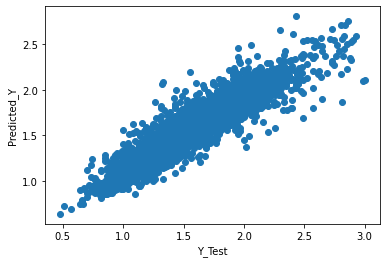

In [115]:
#checking the diff between actual and predicted value using graph
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y_Test')
plt.ylabel('Predicted_Y')


In [ ]:
Here From Graph ,model is predicting near to actual value.

In [116]:
## Conclusion : -
a =np.array(y_test)
predicted = np.array(rf.predict(x_test))
df =  pd.DataFrame({ 'Original' : a,
                     'predicted' :predicted ,
                   },index = range(len(a))) 
df


,Original,predicted
0,1.05,1.29480
1,1.17,1.10000
2,2.89,2.52775
3,1.66,1.68165
4,0.98,1.07520
...,...,...
3520,1.80,1.80435
3521,1.91,1.71020
3522,1.47,1.57120
3523,1.55,1.57340


# For Classification label:-

In [117]:
#importing library for classification prediction
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier


In [118]:
#assign the value of x and y for training and testing phase
xc = avocado_df.drop(columns=['region','Date'])
yc = avocado_df[["region"]]
print(xc.shape)
print(yc.shape)


(11747, 12)
(11747, 1)


In [119]:
#Standardize the value of x so that mean will 0 and SD will become 1 , and make the data as normal distributed
sc = StandardScaler()
sc.fit_transform(xc)


array([[-0.57139083,  0.64396852, -0.22657953, ..., -1.74382788,
        -1.16468113,  1.60174788],
       [-0.5196167 ,  0.55098068, -0.37775734, ..., -1.74382788,
        -1.16468113,  1.60174788],
       [-1.60687349,  0.99972514, -0.32046683, ..., -1.74382788,
        -1.16468113,  1.60174788],
       ...,
       [ 0.82651077, -0.28611936, -0.17673045, ...,  0.57345109,
         2.02299576, -1.45140238],
       [ 0.98183317, -0.18545273, -0.08702685, ...,  0.57345109,
         2.02299576, -1.45140238],
       [ 0.1793341 , -0.13855122,  0.15013739, ...,  0.57345109,
         2.02299576, -1.45140238]])

In [120]:

model = [LogisticRegression(),KNeighborsClassifier(),RandomForestClassifier(),SVC(),DecisionTreeClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]
max_acc_score = 0
for r_state in range(40,100):
    xc_train,xc_test,yc_train,yc_test = train_test_split(xc,yc,random_state = r_state,test_size = 0.30)
    for i in model:
        i.fit(xc_train,yc_train)
        pred = i.predict(xc_test)
        score = accuracy_score(yc_test,pred)
        print("acc score correspond to random state " ,r_state ,"is", score)
        if score> max_acc_score:
            max_acc_score=score
            final_state = r_state
            final_model = i
            
print("max acc score correspond to random state " ,final_state , "is" , max_acc_score ,"and model is",final_model)


acc score correspond to random state  40 is 0.20198581560283688
acc score correspond to random state  40 is 0.6175886524822695
acc score correspond to random state  40 is 0.8822695035460993
acc score correspond to random state  40 is 0.02921985815602837
acc score correspond to random state  40 is 0.7534751773049645
acc score correspond to random state  40 is 0.04368794326241135
acc score correspond to random state  40 is 0.7931914893617021
acc score correspond to random state  41 is 0.20453900709219858
acc score correspond to random state  41 is 0.6201418439716312
acc score correspond to random state  41 is 0.8819858156028368
acc score correspond to random state  41 is 0.028368794326241134
acc score correspond to random state  41 is 0.7560283687943262
acc score correspond to random state  41 is 0.05219858156028369
acc score correspond to random state  41 is 0.7943262411347518
acc score correspond to random state  42 is 0.19687943262411348
acc score correspond to random state  42 is 0.6

acc score correspond to random state  58 is 0.04936170212765958
acc score correspond to random state  58 is 0.8042553191489362
acc score correspond to random state  59 is 0.2198581560283688
acc score correspond to random state  59 is 0.6059574468085106
acc score correspond to random state  59 is 0.8851063829787233
acc score correspond to random state  59 is 0.02553191489361702
acc score correspond to random state  59 is 0.750354609929078
acc score correspond to random state  59 is 0.05078014184397163
acc score correspond to random state  59 is 0.8031205673758866
acc score correspond to random state  60 is 0.1974468085106383
acc score correspond to random state  60 is 0.6119148936170212
acc score correspond to random state  60 is 0.8893617021276595
acc score correspond to random state  60 is 0.02695035460992908
acc score correspond to random state  60 is 0.7548936170212766
acc score correspond to random state  60 is 0.06468085106382979
acc score correspond to random state  60 is 0.79234

acc score correspond to random state  77 is 0.8825531914893617
acc score correspond to random state  77 is 0.027801418439716313
acc score correspond to random state  77 is 0.75177304964539
acc score correspond to random state  77 is 0.0524822695035461
acc score correspond to random state  77 is 0.7934751773049645
acc score correspond to random state  78 is 0.21304964539007093
acc score correspond to random state  78 is 0.6127659574468085
acc score correspond to random state  78 is 0.8859574468085106
acc score correspond to random state  78 is 0.02127659574468085
acc score correspond to random state  78 is 0.7651063829787234
acc score correspond to random state  78 is 0.07234042553191489
acc score correspond to random state  78 is 0.8028368794326242
acc score correspond to random state  79 is 0.21304964539007093
acc score correspond to random state  79 is 0.603404255319149
acc score correspond to random state  79 is 0.8814184397163121
acc score correspond to random state  79 is 0.027234

acc score correspond to random state  95 is 0.7957446808510639
acc score correspond to random state  96 is 0.2170212765957447
acc score correspond to random state  96 is 0.6104964539007092
acc score correspond to random state  96 is 0.8831205673758865
acc score correspond to random state  96 is 0.02695035460992908
acc score correspond to random state  96 is 0.769645390070922
acc score correspond to random state  96 is 0.05134751773049646
acc score correspond to random state  96 is 0.7909219858156028
acc score correspond to random state  97 is 0.2028368794326241
acc score correspond to random state  97 is 0.6102127659574468
acc score correspond to random state  97 is 0.8916312056737589
acc score correspond to random state  97 is 0.028652482269503544
acc score correspond to random state  97 is 0.76
acc score correspond to random state  97 is 0.05645390070921986
acc score correspond to random state  97 is 0.7988652482269504
acc score correspond to random state  98 is 0.20340425531914894
a

# Cross Validation of Models:-

In [132]:
from sklearn.model_selection import ShuffleSplit
n_samples = xc.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=67)
cvs = cross_val_score(LogisticRegression(), xc, yc, cv=cv)
print("Cross Validation of LogisticRegression model ",cvs.mean())


Cross Validation of LogisticRegression model  0.2054468085106383


In [125]:
from sklearn.model_selection import ShuffleSplit
n_samples = xc.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=67)
cvs = cross_val_score(KNeighborsClassifier(), xc, yc, cv=cv)
print("Cross Validation of KNeighbors Classifier model ",cvs.mean())


Cross Validation of KNeighbors Classifier model  0.6159432624113476


In [127]:
from sklearn.model_selection import ShuffleSplit
n_samples = xc.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=67)
cvs = cross_val_score(RandomForestClassifier(), xc, yc, cv=cv)
print("Cross Validation of RandomForest Classifier model ",cvs.mean())


Cross Validation of RandomForest Classifier model  0.8831205673758864


In [128]:
from sklearn.model_selection import ShuffleSplit
n_samples = xc.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=67)
cvs = cross_val_score(SVC(), xc, yc, cv=cv)
print("Cross Validation of SVM Classifier model ",cvs.mean())


Cross Validation of SVM Classifier model  0.027858156028368792


In [129]:
from sklearn.model_selection import ShuffleSplit
n_samples = xc.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=67)
cvs = cross_val_score(DecisionTreeClassifier(), xc, yc, cv=cv)
print("Cross Validation of DecisionTree Classifier model ",cvs.mean())


Cross Validation of DecisionTree Classifier model  0.7599432624113475


In [130]:
from sklearn.model_selection import ShuffleSplit
n_samples = xc.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=67)
cvs = cross_val_score(AdaBoostClassifier(), xc, yc, cv=cv)
print("Cross Validation of AdaBoost Classifier model ",cvs.mean())


Cross Validation of AdaBoost Classifier model  0.06428368794326242


In [131]:
from sklearn.model_selection import ShuffleSplit
n_samples = xc.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=67)
cvs = cross_val_score(GradientBoostingClassifier(), xc, yc, cv=cv)
print("Cross Validation of GradientBoosting Classifier model ",cvs.mean())


Cross Validation of GradientBoosting Classifier model  0.8038581560283689


Crossvalidation score is maximum for Random Forest classifier,so will do Hyperparameter tuning for RandomForest.

In [135]:
#Checking the best parameter for prediction of Random Forest Regressor Algo using GridSearchCV
xc_train,xc_test,yc_train,yc_test = train_test_split(xc,yc,random_state = 67,test_size = 0.30)
rf = RandomForestClassifier()
parameters={'n_estimators' : [100,200],'criterion':['gini','entropy']}
gridsearch=GridSearchCV(rf,parameters)
gridsearch.fit(xc_train,yc_train)
gridsearch.best_params_


{'criterion': 'gini', 'n_estimators': 200}

In [136]:
## Providing best parameters to Model:
rf = RandomForestClassifier(criterion='gini',n_estimators=200)
rf.fit(xc_train,yc_train)
pred = rf.predict(xc_test)
score = accuracy_score(yc_test,pred)
print("Accuracy Score :",score*100)


Accuracy Score : 89.58865248226951


In [155]:
print(confusion_matrix(yc_test,pred))


[[85  0  0 ...  0  0  0]
 [ 0 47  0 ...  0  0  0]
 [ 0  0 44 ...  0  0  0]
 ...
 [ 0  0  0 ...  7  0  0]
 [ 0  0  0 ...  0 32  0]
 [ 0  2  1 ...  0  0 33]]


In [138]:
print(classification_report(yc_test,pred)) 


[[86  0  0 ...  0  0  0]
 [ 0 45  0 ...  0  0  0]
 [ 0  0 44 ...  0  0  0]
 ...
 [ 0  0  0 ...  7  0  0]
 [ 0  0  0 ...  0 32  0]
 [ 0  1  1 ...  0  0 33]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.93        87
           1       0.80      0.80      0.80        56
           2       0.94      0.94      0.94        47
           3       0.97      0.84      0.90       102
           4       0.93      0.98      0.96        58
           5       0.92      0.80      0.86        90
           6       0.97      1.00      0.98        61
           7       0.86      0.95      0.91        66
           8       0.96      0.96      0.96        49
           9       0.90      0.96      0.93        48
          10       0.83      0.88      0.85        82
          11       0.98      0.96      0.97        48
          12       1.00      0.89      0.94        44
          13       0.87      0.80      0.83        59
          14       0.78      0.95

Model score is higher for classification means  for region label.

In [161]:
pred_probab = rf.predict_proba(xc_test)[:,1]
pred_probab


array([0.  , 0.01, 0.  , ..., 0.  , 0.  , 0.  ])

In [162]:
fpr,tpr,thresholds = roc_curve(yc_test,pred_probab,pos_label=True)


# Saving the model

In [163]:
print(fpr)
print("\n")
print(tpr)
print("\n")
print(thresholds)


[0.00000000e+00 0.00000000e+00 2.88267512e-04 2.88267512e-04
 2.88267512e-04 2.88267512e-04 2.88267512e-04 2.88267512e-04
 2.88267512e-04 2.88267512e-04 5.76535025e-04 5.76535025e-04
 5.76535025e-04 1.15307005e-03 1.44133756e-03 1.44133756e-03
 1.72960507e-03 1.72960507e-03 2.30614010e-03 2.59440761e-03
 2.88267512e-03 3.45921015e-03 3.45921015e-03 3.74747766e-03
 4.61228020e-03 5.18881522e-03 5.47708273e-03 6.63015278e-03
 7.20668781e-03 8.64802537e-03 9.80109542e-03 1.00893629e-02
 1.06658980e-02 1.18189680e-02 1.26837705e-02 1.47016431e-02
 1.61429807e-02 1.78725858e-02 2.04669934e-02 2.21965984e-02
 2.62323436e-02 2.91150187e-02 3.54569040e-02 4.35283943e-02
 5.53473624e-02 7.61026232e-02 1.05505909e-01 1.85932545e-01
 1.00000000e+00]


[0.         0.01785714 0.01785714 0.05357143 0.08928571 0.17857143
 0.21428571 0.25       0.32142857 0.39285714 0.41071429 0.44642857
 0.48214286 0.48214286 0.51785714 0.53571429 0.57142857 0.60714286
 0.64285714 0.66071429 0.66071429 0.69642857 0.7

AUC Curve,More the area under curve means better the prediction.

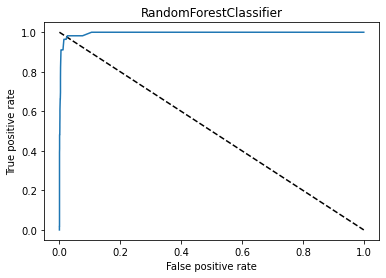

In [164]:
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()


Conclusion :- Taking Region as target variable is predicting better than Average Price.Accuracy score is higher than r2 score.

# Saving the model:

In [165]:
import pickle
filename = 'Avocado_Analysis.pickle'
pickle.dump(rf,open(filename,'wb'))